In [53]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier
from scipy.stats import ttest_ind





In [3]:
%%cmd 
dir

Microsoft Windows [Version 6.1.7601]
Copyright (c) 2009 Microsoft Corporation. Alle Rechte vorbehalten.

(PDSH_mod) C:\Users\Tobsecret\Desktop\Lectures\Topics in Bioinformatics\Module 2 Molecular Classification of Cancer\Golub_dataset_Class_Prediction_Python
> dir
 Datentr„ger in Laufwerk C: ist Acer
 Volumeseriennummer: E6C9-99F6

 Verzeichnis von C:\Users\Tobsecret\Desktop\Lectures\Topics in Bioinformatics\Module 2 Molecular Classification of Cancer\Golub_dataset_Class_Prediction_Python

20.02.2017  16:50    <DIR>          .
20.02.2017  16:50    <DIR>          ..
13.02.2017  21:21    <DIR>          .ipynb_checkpoints
13.02.2017  21:46         1.860.352 data_set_ALL_AML_independent.tsv
14.02.2017  11:02         2.046.810 data_set_ALL_AML_train.tsv
20.02.2017  16:39             6.667 environment.txt
20.02.2017  16:50            73.508 Golub_dataset_Class_Prediction.ipynb
20.02.2017  16:12             1.087 LICENSE
20.02.2017  16:12               316 README.md
13.02.2017  22:18         

In [4]:
test = pd.read_csv('data_set_ALL_AML_independent.tsv', sep='\t', header=0, index_col=0)
test.head(5)

,Gene Accession Number,39,call,40,call.1,42,call.2,47,call.3,48,...,65,call.29,66,call.30,63,call.31,64,call.32,62,call.33
Gene Description,,,,,,,,,,,,,,,,,,,,,
AFFX-BioB-5_at (endogenous control),AFFX-BioB-5_at,-342,A,-87,A,22,A,-243,A,-130,...,-62,A,-58,A,-161,A,-48,A,-176,A
AFFX-BioB-M_at (endogenous control),AFFX-BioB-M_at,-200,A,-248,A,-153,A,-218,A,-177,...,-198,A,-217,A,-215,A,-531,A,-284,A
AFFX-BioB-3_at (endogenous control),AFFX-BioB-3_at,41,A,262,A,17,A,-163,A,-28,...,-5,A,63,A,-46,A,-124,A,-81,A
AFFX-BioC-5_at (endogenous control),AFFX-BioC-5_at,328,A,295,A,276,A,182,A,266,...,141,A,95,A,146,A,431,A,9,A
AFFX-BioC-3_at (endogenous control),AFFX-BioC-3_at,-224,A,-226,A,-211,A,-289,A,-170,...,-256,A,-191,A,-172,A,-496,A,-294,A


In [5]:
train = pd.read_csv('data_set_ALL_AML_train.tsv', sep='\t', header=0, index_col=0)
train.drop(train.columns[len(train.columns)-1], axis=1, inplace=True)
#df.drop(df.columns[len(df.columns)-1], axis=1, inplace=True)
train.head(5)

,Gene Accession Number,1,call,2,call.1,3,call.2,4,call.3,5,...,29,call.33,30,call.34,31,call.35,32,call.36,33,call.37
Gene Description,,,,,,,,,,,,,,,,,,,,,
AFFX-BioB-5_at (endogenous control),AFFX-BioB-5_at,-214,A,-139,A,-76,A,-135,A,-106,...,15,A,-318,A,-32,A,-124,A,-135,A
AFFX-BioB-M_at (endogenous control),AFFX-BioB-M_at,-153,A,-73,A,-49,A,-114,A,-125,...,-114,A,-192,A,-49,A,-79,A,-186,A
AFFX-BioB-3_at (endogenous control),AFFX-BioB-3_at,-58,A,-1,A,-307,A,265,A,-76,...,2,A,-95,A,49,A,-37,A,-70,A
AFFX-BioC-5_at (endogenous control),AFFX-BioC-5_at,88,A,283,A,309,A,12,A,168,...,193,A,312,A,230,P,330,A,337,A
AFFX-BioC-3_at (endogenous control),AFFX-BioC-3_at,-295,A,-264,A,-376,A,-419,A,-230,...,-51,A,-139,A,-367,A,-188,A,-407,A


In [6]:
sample_table = pd.read_csv('table_ALL_AML_samples.txt', sep='\t')
sample_table['Idealized'] = 0
sample_table['Idealized'].loc[sample_table['ALL/AML']=='ALL'] = 1
sample_table.head(70)

C:\Users\Tobsecret\Anaconda3\envs\PDSH_mod\lib\site-packages\pandas\core\indexing.py:132: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


,Samples,ALL/AML,Idealized
0,1,ALL,1
1,2,ALL,1
2,3,ALL,1
3,4,ALL,1
4,5,ALL,1
5,6,ALL,1
6,7,ALL,1
7,8,ALL,1
8,9,ALL,1
9,10,ALL,1


##### Normalizing the Data
We normalize each element x by subtracting the row minimum and dividing by (row maximum minus row minimum).

x = (x - row_min) / (row_max - row_min)

In [7]:
norm_train = train.iloc[:,1::2].apply(lambda x: (x - np.min(x))/(np.max(x)-np.min(x)), axis=1)
print(norm_train.shape)
norm_train.head(3)

(7129, 38)


,1,2,3,4,5,6,7,8,9,10,...,35,36,37,38,28,29,30,31,32,33
Gene Description,,,,,,,,,,,,,,,,,,,,,
AFFX-BioB-5_at (endogenous control),0.531440,0.683570,0.811359,0.691684,0.750507,0.685598,0.819473,0.127789,0.975659,0.787018,...,0.979716,0.533469,0.914807,0.819473,0.957404,0.995943,0.320487,0.900609,0.713996,0.691684
AFFX-BioB-M_at (endogenous control),0.566775,0.827362,0.905537,0.693811,0.657980,0.788274,0.596091,0.218241,0.651466,0.723127,...,0.739414,0.244300,1.000000,0.612378,0.687296,0.693811,0.439739,0.905537,0.807818,0.459283
AFFX-BioB-3_at (endogenous control),0.435315,0.534965,0.000000,1.000000,0.403846,0.912587,0.952797,0.548951,0.722028,0.610140,...,0.437063,0.774476,0.753497,0.534965,0.318182,0.540210,0.370629,0.622378,0.472028,0.414336


In [8]:
norm_test = test.iloc[:,1::2].apply(lambda x: (x - np.min(x))/(np.max(x)-np.min(x)), axis=1)
norm_test = norm_test.reindex_axis(sorted(norm_test.columns, key=int), axis=1)

In [9]:
norm_train.columns


Index(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13',
       '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25',
       '26', '27', '34', '35', '36', '37', '38', '28', '29', '30', '31', '32',
       '33'],
      dtype='object')

In [26]:
sample_table.iloc[:len(norm_train.columns),-1:]#.transpose()

,Idealized
0,1
1,1
2,1
3,1
4,1
5,1
6,1
7,1
8,1
9,1


In [11]:
norm_train = norm_train.reindex_axis(sorted(list(norm_train.columns.values), key=int), axis=1)
norm_train.head(3)

,1,2,3,4,5,6,7,8,9,10,...,29,30,31,32,33,34,35,36,37,38
Gene Description,,,,,,,,,,,,,,,,,,,,,
AFFX-BioB-5_at (endogenous control),0.531440,0.683570,0.811359,0.691684,0.750507,0.685598,0.819473,0.127789,0.975659,0.787018,...,0.995943,0.320487,0.900609,0.713996,0.691684,0.924949,0.979716,0.533469,0.914807,0.819473
AFFX-BioB-M_at (endogenous control),0.566775,0.827362,0.905537,0.693811,0.657980,0.788274,0.596091,0.218241,0.651466,0.723127,...,0.693811,0.439739,0.905537,0.807818,0.459283,0.390879,0.739414,0.244300,1.000000,0.612378
AFFX-BioB-3_at (endogenous control),0.435315,0.534965,0.000000,1.000000,0.403846,0.912587,0.952797,0.548951,0.722028,0.610140,...,0.540210,0.370629,0.622378,0.472028,0.414336,0.449301,0.437063,0.774476,0.753497,0.534965


#### Neighbourhood analysis
We start out with a g*i matrix where g are the genes and i the samples which belong to classes 1 and 2.

Every row g represents a vector v(g) = (g1, g2, g3 ... gn) where gi denotes the gene expression of gene g in the ith sample.

We start with an idealized expression pattern c = (c1, c2, c3 ... cn) where ci is either 1 or 0, depending on which of the two original classes sample i is a part of. 

We then start computing the correllation between genes and class distinction.  

The means of class 1 and the standard deviation of class 1 are represented by [mu1(log(g)), sigma1(log(g))] 

The means of class 2 and the standard deviation of class 2 are represented by [mu2(log(g)), sigma2(log(g))] 

The correlation coefficient P is then P(g, c) = [mu1(g) - mu2(g)] / [sigma1(g) + sigma2(g)]

Neighbourhoods N(c,r) around classes 1 and 2 of radius r, are a colllection of genes such that  P(g,c) = 1 and P(g,c)=-1 respectively.

To control for random class association, one compares the size of a neighbourhood N(c,r) to the sizes of randomized class association patterns c. For each gene one can then compute the likelihood of it associating with a random neighbourhood.

#### K-nearest neighbours
We will try out various different selections of the data and train a separate model for each.
Let's start with the whole data set.


In [12]:
norm_train_transp = norm_train.T

In [13]:
neigh = KNeighborsClassifier()
neigh.fit(norm_train_transp, sample_table.iloc[:38,1:2].values.reshape(38))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

Let's score on the training data set to see whether our model is reasonably trained.

In [15]:
neigh.score(norm_train.T, sample_table.iloc[:38,1:2].values.reshape(38))

0.94736842105263153

Let's score on the test set:

In [16]:
neigh.score(norm_test.T, sample_table.iloc[38:, 1:2].values.reshape(34))

0.70588235294117652

#### K-nearest Neighbours Bagging Ensemble
In the following lines we'll try out the BaggingClassifier from scikit-learn and we will populate it with a K-nearest Neighbours Classifier.

In [20]:
bagging_neigh = BaggingClassifier(KNeighborsClassifier(), 
                                 max_samples=0.5, max_features=0.5)
bagging_neigh.fit(norm_train.T, sample_table.iloc[:38,1:2].values.reshape(38))

BaggingClassifier(base_estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
         bootstrap=True, bootstrap_features=False, max_features=0.5,
         max_samples=0.5, n_estimators=10, n_jobs=1, oob_score=False,
         random_state=None, verbose=0, warm_start=False)

In [22]:
bagging_neigh.score(norm_train.T, sample_table.iloc[:38,1:2].values.reshape(38))

0.81578947368421051

In [23]:
bagging_neigh.score(norm_test.T, sample_table.iloc[38:, 1:2].values.reshape(34))

0.61764705882352944

In [32]:
norm_train.iloc[:1,26:]

,27,28,29,30,31,32,33,34,35,36,37,38
Gene Description,,,,,,,,,,,,
AFFX-BioB-5_at (endogenous control),0.411765,0.957404,0.995943,0.320487,0.900609,0.713996,0.691684,0.924949,0.979716,0.533469,0.914807,0.819473


In [39]:
ttest_ind(norm_train.iloc[:1, :26].values.reshape(26,1), norm_train.iloc[:1,26:].values.reshape(12,1)).pvalue

array([ 0.42151503])

In [50]:
#The following line computes the independent t-tests between the AML and ALL samples for every gene.
norm_train_ttest_pvals = norm_train.apply(lambda x: 1-ttest_ind(x.iloc[:26].values.reshape(26,1), x.iloc[26:].values.reshape(12,1), equal_var=False).pvalue , axis=1).iloc[:,:1]

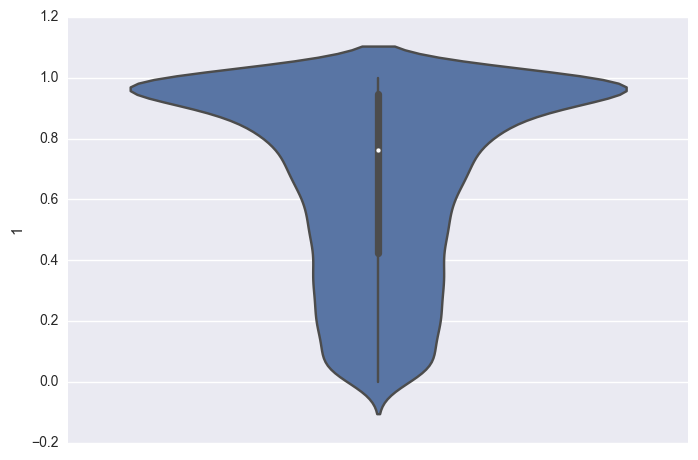

In [74]:
sns.violinplot( y="1", data=norm_train_ttest_pvals);


#### Non-normalized Data
Let's try the same things with only a subset of genes and no normalization besides setting all values below 0 to 1.

In [88]:
non_negative_train = train.iloc[:,1::2].clip_lower(1)
non_negative_train 
non_negative_test = test.iloc[:, 1::2].clip_lower(1)
non_negative_test

,39,40,42,47,48,49,41,43,44,45,...,54,57,58,60,61,65,66,63,64,62
Gene Description,,,,,,,,,,,,,,,,,,,,,
AFFX-BioB-5_at (endogenous control),1,1,22,1,1,1,1,86,1,1,...,1,1,1,1,1,1,1,1,1,1
AFFX-BioB-M_at (endogenous control),1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
AFFX-BioB-3_at (endogenous control),41,262,17,1,1,1,1,1,170,312,...,102,1,1,38,1,1,63,1,1,1
AFFX-BioC-5_at (endogenous control),328,295,276,182,266,24,142,252,174,142,...,319,178,340,31,396,141,95,146,431,9
AFFX-BioC-3_at (endogenous control),1,1,1,1,1,1,1,1,1,114,...,1,1,1,1,1,1,1,1,1,1
AFFX-BioDn-5_at (endogenous control),1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
AFFX-BioDn-3_at (endogenous control),1,367,55,1,1,709,1,1,8,1,...,1,1,1,242,236,1,1,1,1,1
AFFX-CreX-5_at (endogenous control),1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
AFFX-CreX-3_at (endogenous control),137,194,1,52,10,27,1,1,1,12,...,1,112,1,1,95,1,1,171,235,166


We are 

In [73]:
#The following line computes the independent t-tests between the AML and ALL samples for every gene.
non_negative_train_ttest_pvals = non_negative_train.apply(lambda x: 1-ttest_ind(x.iloc[:26].values.reshape(26,1), x.iloc[26:].values.reshape(12,1), equal_var=False).pvalue , axis=1).iloc[:,:1]

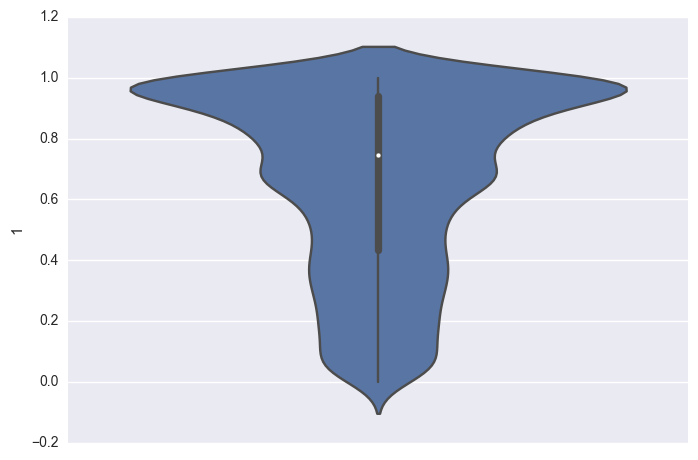

In [75]:
sns.violinplot( y="1", data=non_negative_train_ttest_pvals);


#### 

In [94]:
top3000_ttest_mask = non_negative_train_ttest_pvals.sort_values('1', axis=0, ascending=False).head(3000).index

In [89]:
top3000_non_negative_train = non_negative_train.loc[top3000_ttest_mask]
top3000_non_negative_test = non_negative_test.loc[top3000_ttest_mask]

In [92]:
topneigh = KNeighborsClassifier()
topneigh.fit(top3000_non_negative_train.T, sample_table.iloc[:38,1:2].values.reshape(38))
print('Training Prediction Performance: ', 
      topneigh.score(top3000_non_negative_train.T, sample_table.iloc[:38,1:2].values.reshape(38)),
      ' Testing Prediction Performance: ',
      topneigh.score(top3000_non_negative_test.T, sample_table.iloc[38:, 1:2].values.reshape(34)))

Training Prediction Performance:  0.973684210526  Testing Prediction Performance:  0.617647058824


In [ ]:
bagging_neigh = BaggingClassifier(KNeighborsClassifier(), 
                                 max_samples=0.5, max_features=0.5)